<a href="https://colab.research.google.com/github/Ilhom-Utkirov/NAS/blob/main/check_gpu3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd '/content/drive/MyDrive/mldl_projects2'

/content/drive/MyDrive/mldl_projects2


In [ ]:
!pwd

/content/drive/MyDrive/mldl_projects2


In [ ]:
%ls

coco/  visualwakewords/


In [ ]:
!git clone https://github.com/Mxbonn/visualwakewords

In [ ]:
!pip install pyvww

In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torchvision.datasets import VisionDataset
from torch.utils.data import DataLoader
import torch.optim as optim

import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import pandas as pd
import pyvww
import os, os.path


torch.cuda.is_available()
# True

False

In [ ]:
!bash /content/drive/MyDrive/mldl_projects2/visualwakewords/scripts/download_mscoco.sh /content/drive/MyDrive/mldl_projects2/coco 2014


--2023-07-10 15:53:43--  http://images.cocodataset.org/zips/train2014.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 54.231.201.217, 52.216.41.241, 54.231.197.241, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|54.231.201.217|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13510573713 (13G) [application/zip]
Saving to: ‘train2014.zip’

train2014.zip       100%[===================>]  12.58G  56.0MB/s    in 4m 47s  

2023-07-10 15:58:29 (45.0 MB/s) - ‘train2014.zip’ saved [13510573713/13510573713]

Unzipping train2014.zip
--2023-07-10 16:13:33--  http://images.cocodataset.org/zips/val2014.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.217.162.105, 3.5.0.21, 3.5.29.160, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|52.217.162.105|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6645013297 (6.2G) [application/zip]
Saving to: ‘val2014.zip’

val2014.zip         100%[

# Preprocess

In [ ]:
# import shutil

# folder_path = "/content/drive/MyDrive/mldl_projects2/coco/all2014"  # Path to the folder you want to download
# zip_file_path = "/content/drive/MyDrive/mldl_projects2/coco/all2014"  # Path for the ZIP file to be created

# shutil.make_archive(zip_file_path, 'zip', folder_path)

'/content/drive/MyDrive/mldl_projects2/coco/all2014.zip'

In [ ]:
# !zip -r /content/drive/MyDrive/mldl_projects2/coco/all2014_2.zip /content/drive/MyDrive/mldl_projects2/coco/all2014

  adding: content/drive/MyDrive/mldl_projects2/coco/all2014/ (stored 0%)


In [ ]:
# from google.colab import files
#

In [ ]:
# files.download('/content/drive/MyDrive/mldl_projects2/coco/all2014.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# !pwd

/content/drive/MyDrive/mldl_projects2


In [ ]:
# import os
# path = "/content/drive/MyDrive/mldl_projects2" # /content is pretty much the root. you can choose other path in your colab workspace
# os.chdir(path)

#unzip

In [ ]:
import os
os.makedirs('/content/drive/MyDrive/mldl_projects2/data')
os.chdir('/content/drive/MyDrive/mldl_projects2/data')


In [ ]:
import zipfile

dataset_zip = '/content/drive/MyDrive/mldl_projects2/data/dataset.zip'  # Path to the uploaded zip file
with zipfile.ZipFile(dataset_zip, 'r') as zip_ref:
    zip_ref.extractall('.')

# Annotations

In [ ]:


# TRAIN_ANNOTATIONS_FILE="/content/coco/annotations/instances_train2014.json"
# VAL_ANNOTATIONS_FILE="/content/coco-dataset/annotations/instances_val2014.json"
# DIR="/content/coco-dataset/annotations"
!python /content/drive/MyDrive/mldl_projects2/visualwakewords/scripts/create_coco_train_minival_split.py --train_annotations_file=/content/drive/MyDrive/mldl_projects2/coco/annotations/instances_train2014.json --val_annotations_file=/content/drive/MyDrive/mldl_projects2/coco/annotations/instances_val2014.json --output_dir=/content/drive/MyDrive/mldl_projects2/coco/data





In [ ]:
# MAXITRAIN_ANNOTATIONS_FILE="/content/drive/MyDrive/mldl_projects2/coco/data/instances_maxitrain.json"
# MINIVAL_ANNOTATIONS_FILE="/content/drive/MyDrive/mldl_projects2/coco/data/instances_minival.json"
# VWW_OUTPUT_DIR="/content/drive/MyDrive/mldl_projects2/coco/annotations"
!python /content/drive/MyDrive/mldl_projects2/visualwakewords/scripts/create_visualwakewords_annotations.py --train_annotations_file=/content/drive/MyDrive/mldl_projects2/coco/data/instances_maxitrain.json --val_annotations_file=/content/drive/MyDrive/mldl_projects2/coco/data/instances_minival.json --output_dir=/content/drive/MyDrive/mldl_projects2/coco/data --threshold=0.005 --foreground_class='person'




Processing /content/drive/MyDrive/mldl_projects2/coco/data/instances_maxitrain.json...
loading annotations into memory...
Done (t=20.30s)
creating index...
index created!
There are 55233 images that now have label person, of the 115228 images in total.
Processing /content/drive/MyDrive/mldl_projects2/coco/data/instances_minival.json...
loading annotations into memory...
Done (t=0.84s)
creating index...
index created!
There are 3800 images that now have label person, of the 8059 images in total.


In [ ]:
# List all files in the folder
# import os
# import pandas as pd

# files = os.listdir('/content/$/content/coco-dataset/annotations')

# image_files = [file for file in files if file.endswith(('.jpg', '.jpeg', '.png', '.gif'))]

# df = pd.DataFrame({'File Name': image_files})
# Display the DataFrame
# print(df)
# df.shape

In [ ]:
# !rm -rf /content/drive/MyDrive/ColabNotebooks/mldl_project_2023/coco

In [ ]:
# %cp -av /content/drive/MyDrive/ColabNotebooks/mldl_project_2023/coco /content/drive/MyDrive/mldl

In [ ]:


# print len([name for name in os.listdir('.') if os.path.isfile(name)])

#### check if folder is empty
# path joining version for other paths
# DIR = '/content/drive/MyDrive/mldl_projects2/coco/all2014/train2014'
# print(len([name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))]))

82783


In [ ]:
# import pyvww
train_data = pyvww.pytorch.VisualWakeWordsClassification(root="/content/drive/MyDrive/mldl_projects2/all2014/train2014",
                                                         annFile="/content/drive/MyDrive/mldl_projects2/coco/data/instances_train.json")
val_data = pyvww.pytorch.VisualWakeWordsClassification(root="/content/drive/MyDrive/mldl_projects2/all2014/val2014",
                                                       annFile="/content/drive/MyDrive/mldl_projects2/coco/data/instances_val.json")
# train_data = pyvww.pytorch.VisualWakeWordsClassification(root="/content/drive/MyDrive/mldl_projects2/coco/all2014/train2014",
#                                                          annFile="/content/drive/MyDrive/mldl_projects2/coco/data/instances_train.json")
# val_data = pyvww.pytorch.VisualWakeWordsClassification(root="/content/drive/MyDrive/mldl_projects2/coco/all2014/val2014",
#                                                        annFile="/content/drive/MyDrive/mldl_projects2/coco/data/instances_val.json")


loading annotations into memory...
Done (t=6.03s)
creating index...
index created!
loading annotations into memory...
Done (t=0.85s)
creating index...
index created!


In [ ]:
import shutil

# Specify the source folder path
source_folder = '/content/drive/MyDrive/mldl_projects2/coco/all2014'

# Specify the destination folder path
destination_folder = '/content/drive/MyDrive/Data'

# Move the folder to the specified destination
shutil.copytree(destination_folder,source_folder)


In [ ]:
print(type(train_data))

<class 'pyvww.pytorch.datasets.VisualWakeWordsClassification'>


In [ ]:
# !rm -rf /content/drive/MyDrive/mldl_project_2023/coco

^C


In [ ]:
# possible 96, 12,93,51,5

In [ ]:
img, target = train_data[5]

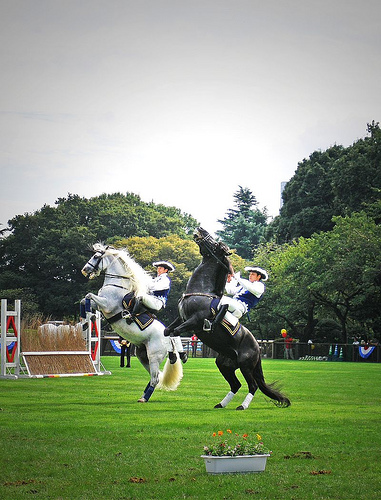

1

In [ ]:
display(img)
display(target)

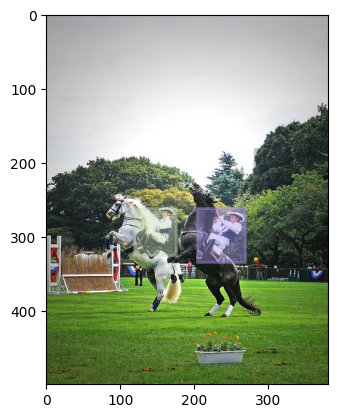

In [ ]:

img_id = train_data.ids[5]
ann_ids = train_data.vww.getAnnIds(imgIds=img_id)
full_target = train_data.vww.loadAnns(ann_ids)
plt.imshow(img)
train_data.vww.showAnns(full_target)

In [ ]:
# train_dataset = VisualWakeWordsDataset(root='path/to/train/dataset', transform=transforms.ToTensor())
# val_dataset = VisualWakeWordsDataset(root='path/to/val/dataset', transform=transforms.ToTensor())

# train_dataloader = DataLoader(train_data, batch_size=32, shuffle=True)
# val_dataloader = DataLoader(val_data, batch_size=32, shuffle=False)

batch_size = 64
train_dataloader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_data, batch_size=batch_size, shuffle=False)

In [ ]:
# search space
search_space = [

    {'layer_type': 'conv', 'filters': 16, 'kernel_size': 3},
    {'layer_type': 'conv', 'filters': 32, 'kernel_size': 3},
    {'layer_type': 'pool', 'pool_size': 2},
    {'layer_type': 'flatten'},
    {'layer_type': 'dense', 'units': 64},
    {'layer_type': 'dense', 'units': 32},
]

In [ ]:
class MyCNN(nn.Module):
    def __init__(self, architecture):
        super(MyCNN, self).__init__()  #
        in_channels = 3  # input images 3 channels
        layers = []
        for layer_config in architecture:
            layer_type = layer_config['layer_type']
            if layer_type == 'conv':
                filters = layer_config['filters']
                kernel_size = layer_config['kernel_size']
                layers.append(nn.Conv2d(in_channels, filters, kernel_size))
                layers.append(nn.ReLU())
                in_channels = filters
            elif layer_type == 'pool':
                pool_size = layer_config['pool_size']
                layers.append(nn.MaxPool2d(pool_size))
            elif layer_type == 'flatten':
                layers.append(nn.Flatten())
            elif layer_type == 'dense':
                units = layer_config['units']
                layers.append(nn.Linear(in_channels, units))  #
                layers.append(nn.ReLU())
                in_channels = units  #
        self.network = nn.Sequential(*layers)

    def forward(self, x):
        return self.network(x)

# Metric

In [ ]:
# Define the evaluation metric (NASWOT)
def NASWOT(net, inputs):
    with torch.no_grad():
        codes = []

        def hook(self, input, output):
            code = (output > 0).flatten(start_dim=1)
            codes.append(code)

        hooks = []
        for m in net.modules():
            if isinstance(m, nn.ReLU):
                hooks.append(m.register_forward_hook(hook))

        _ = net(inputs)

        for h in hooks:
            h.remove()

        full_code = torch.cat(codes, dim=1)
        del codes

        # Calculate the NASWOT score
        score = full_code.sum().item()

        return score


In [ ]:
def count_parameters(model):
    params = [p.numel() for p in model.parameters() if p.requires_grad]
    for item in params:
        print(f'{item:>8}')
    print(f'________\n{sum(params):>12}')

# Main body

In [ ]:

# number of architectures to evaluate
num_architectures = 10
history = []
# Perform NAS using random search
best_model = None
highest_score = -float('inf')

for _ in range(num_architectures):
    # Generate a random architecture size
    architecture_size = torch.randint(1, 5, size=(1,)) #3 range [1,4]
    #Generate random architecture
    architecture = [search_space[i] for i in
                    torch.randint(len(search_space), size=(architecture_size.item(),))]

    # Create the model based on the random architecture
    model = MyCNN(architecture)
    print(model)
    # Train and evaluate the model
    optimizer = torch.optim.Adam(model.network.parameters(), lr=0.01)
    criterion = nn.CrossEntropyLoss()

    num_epochs = 5

    for epoch in range(num_epochs):
        model.train()

        for images, labels in train_dataloader:

            outputs = model(images)
            loss = criterion(outputs, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

    # Evaluate the model using NASWOT
    score = NASWOT(model, train_dataloader)  # Using val_dataloader as input
    history.append({model, score})
    # Update the best model if necessary
    if score > highest_score:
        best_model = model
        highest_score = score


In [ ]:
def evaluate_model(model, data_loader):
    model.eval()
    all_predictions = []
    all_labels = []
    with torch.no_grad():
        for images, labels in data_loader:
            outputs = model(images)
            predictions = torch.argmax(outputs, dim=1)
            all_predictions.extend(predictions.tolist())
            all_labels.extend(labels.tolist())
    accuracy = accuracy_score(all_labels, all_predictions)
    return accuracy

In [ ]:
# Function to compute FLOPs of a model
def compute_flops(model, input_size):
    # Assuming input_size is the size of a single input sample
    input = torch.randn(1, *input_size)
    flops = torch.cuda.FloatTensor(1).zero_()
    flops_hook = model.register_forward_hook(lambda _, input, output: flops.copy_(torch.cuda.FloatTensor([float(model.compute_average_flops_cost(input_size))])))

    model(input.cuda())
    flops = flops.item()
    flops_hook.remove()

    return flops


# Evaluate the best model based on the given constraints
params_count = sum(p.numel() for p in best_model.parameters())
flops = compute_flops(best_model, val_dataloader)  # Replace data

accuracy = evaluate_model(best_model, val_dataloader)  # Replace with your own evaluation method

if params_count <= 2.5e6 and flops <= 2e8 and accuracy >= 80:
    print("Best model satisfies the constraints!")
else:
    print("No model found that satisfies the constraints.")

In [ ]:
#Full code dont run it is for the script just in case

## all in one line

In [ ]:
import pyvww
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torchvision.datasets import VisionDataset
from torch.utils.data import DataLoader
import torch.optim as optim

import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import pandas as pd
import pyvww
import os, os.path
train_data = pyvww.pytorch.VisualWakeWordsClassification(root="/content/drive/MyDrive/mldl_projects2/coco/all2014/train2014",
                                                         annFile="/content/drive/MyDrive/mldl_projects2/coco/data/instances_train.json")
val_data = pyvww.pytorch.VisualWakeWordsClassification(root="/content/drive/MyDrive/mldl_projects2/coco/all2014/val2014",
                                                       annFile="/content/drive/MyDrive/mldl_projects2/coco/data/instances_val.json")

batch_size = 64
train_dataloader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_data, batch_size=batch_size, shuffle=False)
def evaluate_model(model, data_loader):
    model.eval()
    all_predictions = []
    all_labels = []
    with torch.no_grad():
        for images, labels in data_loader:
            outputs = model(images)
            predictions = torch.argmax(outputs, dim=1)
            all_predictions.extend(predictions.tolist())
            all_labels.extend(labels.tolist())
    accuracy = accuracy_score(all_labels, all_predictions)
    return accuracy
class MyCNN(nn.Module):
    def __init__(self, architecture):
        super(MyCNN, self).__init__()  #
        in_channels = 3  # input images 3 channels
        layers = []
        for layer_config in architecture:
            layer_type = layer_config['layer_type']
            if layer_type == 'conv':
                filters = layer_config['filters']
                kernel_size = layer_config['kernel_size']
                layers.append(nn.Conv2d(in_channels, filters, kernel_size))
                layers.append(nn.ReLU())
                in_channels = filters
            elif layer_type == 'pool':
                pool_size = layer_config['pool_size']
                layers.append(nn.MaxPool2d(pool_size))
            elif layer_type == 'flatten':
                layers.append(nn.Flatten())
            elif layer_type == 'dense':
                units = layer_config['units']
                layers.append(nn.Linear(in_channels, units))  #
                layers.append(nn.ReLU())
                in_channels = units  #
        self.network = nn.Sequential(*layers)

    def forward(self, x):
        return self.network(x)

# search space of neural network architectures
search_space = [
    {'layer_type': 'conv', 'filters': 16, 'kernel_size': 3},
    {'layer_type': 'conv', 'filters': 32, 'kernel_size': 3},
    {'layer_type': 'pool', 'pool_size': 2},
    {'layer_type': 'flatten'},
    {'layer_type': 'dense', 'units': 128},
    {'layer_type': 'dense', 'units': 256}
]
#evaluation metric (NASWOT)
# Define the evaluation metric (NASWOT)
def NASWOT(net, inputs):
    with torch.no_grad():
        codes = []

        def hook(self, input, output):
            code = (output > 0).flatten(start_dim=1)
            codes.append(code)

        hooks = []
        for m in net.modules():
            if isinstance(m, nn.ReLU):
                hooks.append(m.register_forward_hook(hook))

        _ = net(inputs)

        for h in hooks:
            h.remove()

        full_code = torch.cat(codes, dim=1)
        del codes

        # Calculate the NASWOT score
        score = full_code.sum().item()

        return score
## ***Main part *** ##
# number of architectures to evaluate
num_architectures = 10
history = []
# Perform NAS using random search
best_model = None
highest_score = -float('inf')

for _ in range(num_architectures):
    # Generate a random architecture size
    architecture_size = torch.randint(1, 5, size=(1,)) #3 range [1,4]
    #Generate random architecture
    architecture = [search_space[i] for i in
                    torch.randint(len(search_space), size=(architecture_size.item(),))]

    # Create the model based on the random architecture
    model = MyCNN(architecture)
    print(model)
    # Train and evaluate the model
    optimizer = torch.optim.Adam(model.network.parameters(), lr=0.01)

    criterion = nn.CrossEntropyLoss()
    num_epochs = 5

    for epoch in range(num_epochs):
        model.train()

        for images, labels in train_dataloader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

    # Evaluate the model using NASWOT
    score = NASWOT(model, train_dataloader)  # Using val_dataloader as input
    history.append({model, score})
    # Update the best model if necessary
    if score > highest_score:
        best_model = model
        highest_score = score

# Function to compute FLOPs of a model
def compute_flops(model, input_size):
    # Assuming input_size is the size of a single input sample
    input = torch.randn(1, *input_size)
    flops = torch.cuda.FloatTensor(1).zero_()
    flops_hook = model.register_forward_hook(lambda _, input, output: flops.copy_(torch.cuda.FloatTensor([float(model.compute_average_flops_cost(input_size))])))

    model(input.cuda())
    flops = flops.item()
    flops_hook.remove()

    return flops


# Evaluate the best model based on the given constraints
params_count = sum(p.numel() for p in best_model.parameters())
flops = compute_flops(best_model, val_dataloader)  # Replace data

accuracy = evaluate_model(best_model, val_dataloader)  # Replace with your own evaluation method

if params_count <= 2.5e6 and flops <= 2e8 and accuracy >= 80:
    print("Best model satisfies the constraints!")
else:
    print("No model found that satisfies the constraints.")
